<a href="https://colab.research.google.com/github/anjihan3601K/Car-price-predictor/blob/main/content_based_MRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

Dataset Link: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset/data

In [5]:
!pip install kaggle -q

In [7]:
import os
import json

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [11]:
kaggle_config = json.load(open("kaggle (1).json"))

In [12]:
kaggle_config.keys()

dict_keys(['username', 'key'])

In [13]:
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

In [14]:
#downloading dataset
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
  0% 0.00/20.7M [00:00<?, ?B/s]
100% 20.7M/20.7M [00:00<00:00, 768MB/s]


In [15]:
!ls

'kaggle (1).json'   sample_data   spotify-million-song-dataset.zip


In [16]:
with zipfile.ZipFile('spotify-million-song-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [17]:
df=pd.read_csv('/content/spotify_millsongdata.csv')

In [18]:
df.head(3)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...


In [19]:
df.shape

(57650, 4)

In [20]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [22]:
# top 10 singers
df['artist'].value_counts().head(10)

,count
artist,
Donna Summer,191
Gordon Lightfoot,189
Bob Dylan,188
George Strait,188
Loretta Lynn,187
Alabama,187
Cher,187
Reba Mcentire,187
Chaka Khan,186


In [23]:
df = df.sample(10000)

df = df.drop('link', axis=1).reset_index(drop=True)

In [25]:
df.shape

(10000, 3)

In [26]:
df.head()

,artist,song,text
0,Cliff Richard,Born To Rock'n'roll,If music be the food of love then play on \r\...
1,Status Quo,Enough Is Enough,I don't care what you say to me \r\nI'm gonna...
2,Weird Al Yankovic,Buy Me A Condo,Gonna buy me a condo \r\nGonna buy me a Cuisi...
3,ZZ Top,Tush,"I been up, I been down. \r\nTake my word, my ..."
4,Wilson Phillips,Goodbye Carmen,And her eyes are like skies about to rain \r\...


In [27]:
# WordCloud for song lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)

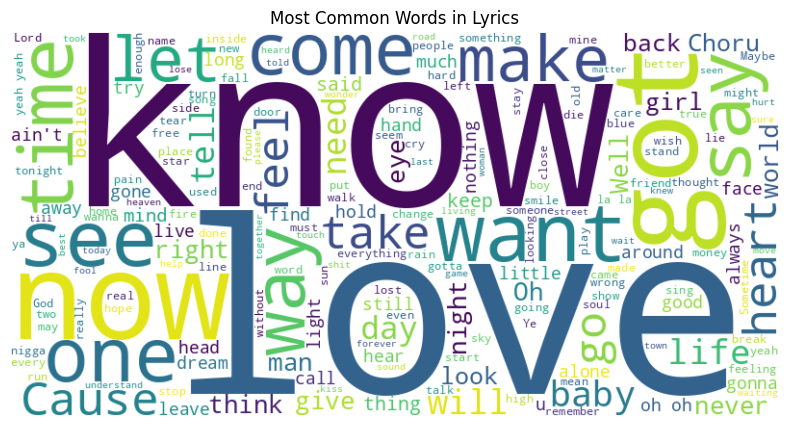

In [28]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

In [29]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
stop_words = set(stopwords.words('english'))

In [31]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [32]:
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [33]:
df.head()

,artist,song,text,cleaned_text
0,Cliff Richard,Born To Rock'n'roll,If music be the food of love then play on \r\...,music food love play lend ears lay song youre ...
1,Status Quo,Enough Is Enough,I don't care what you say to me \r\nI'm gonna...,dont care say im gon na try kick outta door ai...
2,Weird Al Yankovic,Buy Me A Condo,Gonna buy me a condo \r\nGonna buy me a Cuisi...,gon na buy condo gon na buy cuisinart get wall...
3,ZZ Top,Tush,"I been up, I been down. \r\nTake my word, my ...",take word way around aint askin much said lord...
4,Wilson Phillips,Goodbye Carmen,And her eyes are like skies about to rain \r\...,eyes like skies rain theres work done complain...


In [34]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [35]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [37]:
print(cosine_sim)

[[1.         0.00666963 0.00361999 ... 0.         0.02415638 0.06983663]
 [0.00666963 1.         0.05455635 ... 0.00240935 0.0305362  0.0260923 ]
 [0.00361999 0.05455635 1.         ... 0.00242588 0.01976702 0.00168166]
 ...
 [0.         0.00240935 0.00242588 ... 1.         0.05730827 0.01683023]
 [0.02415638 0.0305362  0.01976702 ... 0.05730827 1.         0.04308241]
 [0.06983663 0.0260923  0.00168166 ... 0.01683023 0.04308241 1.        ]]


In [39]:
# Recommendation Function
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=7):
    # Find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"   # can be reworked to compare for songs not present in the dataset
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices]

In [40]:
# Example Recommendation
print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations = recommend_songs("For The First Time") # df["song"][2]
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
             artist                             song
2283        Roxette          For The Very First Time
5875  Kirk Franklin                       First Love
9860  One Direction                  Loved You First
3605    Johnny Cash  First Time Ever I Saw Your Face
1516     Puff Daddy   Through The Pain (She Told Me)
4686            XTC              Love At First Sight
1170  Lionel Richie                              Why
